In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((3, 1))

weights

array([[4.17022005e-01],
       [7.20324493e-01],
       [1.14374817e-04]])

Но мало просто присвоить определенные веса нейронам. Необходимо также определить функцию по которой будет активироваться нейроны. Выбранная функция активация будет одинаковой для всех нейронов. С помощью нее можно определять с какой силой нужно подействовать на нейрон, чтобы он  активировался и передал сигнал дальше.

$$Y = \sum{weights * X} + bias$$

Выше показан нейрон в виде формулы. Активация его как говорилась зависит от входных данных, его весов и некоего порогого значения.

Функций таких существует очень много - сигмоида, линейная, ступенчатая, ReLU, tahn и т. д.

<img src='https://drive.google.com/uc?export=view&id=1jFJKMuRoaYExj5-lG-UXJ64wlFpo6RDB'>

В данном фрагменте кода мы можем посмотреть как программно реализовать функцию сигмоид -

In [3]:
# вычисление сигмоид функции

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

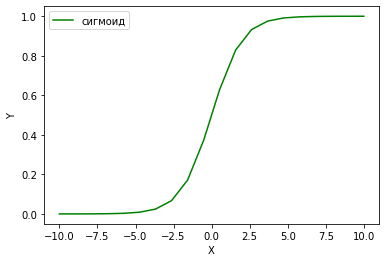

In [4]:
# для картинки
D = 10

X = np.linspace(0-D, 0+D, 20)
Y = sigmoid(X)

plt.plot(X, Y, '-g', label='сигмоид')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

А вот, как например на Python, можно реализовать упомянутую выше функцию активации Relu - 

In [5]:
# вычисление Relu функции

def ReLU(x):
    return x * (x > 0)

In [6]:
def ReLU_deriv(x):
    return 1 if x >= 0 else 0

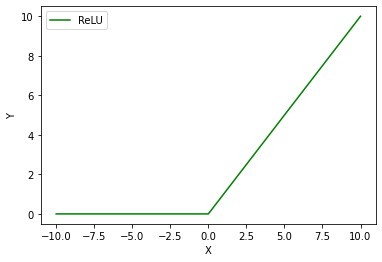

In [7]:
# для картинки
D = 10

X = np.linspace(0-D, 0+D, 21)
Y = ReLU(X)

plt.plot(X, Y, '-g', label='ReLU')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Обратное распространение ошибки и градиентный спуск <a class='anchor' id='backprop'>

Давайте прежде чем начнем разбирать обратное распространение и градиентный спуск, скажем несколько слов о тех типах архитектур нейронной сети, которые будут использованы в данном уроке. Это простые нейронные сети. С точки зрения архитектуры их можно отнести к полносвязным нейронным сетям так как все нейроны связаны между собой. С другой стороны их можно отнести к нейронным сетям прямого распространения (feed forward). Сети прямого распространения подразумевает распространения сигналы от вход к выходу, в отличии от реккурентных нейронных сетей, где во внутренних слоях сигналы могут ходить по циклу. О плюсах и минусах сетей полносвязных мы поговорим в уроке посвященном Сверточным нейронным сетям, поскольку данные нейронные сети отошли от этого подхода и нам нужно будет выяснить почему.

После того как на выходе нейронной сети мы получили определенное цифровое значение нам нужно сравнить его с искомым. Мы можем посчитать насколько в количественом выражение ошиблась нейросеть. Задача обратного распространения ошибки пройтись от выхода ко входу и скорректировать веса нейронов. Это процесс происходит множество раз в процесс обучения.

<img src='https://drive.google.com/uc?export=view&id=1XmympDj-QuN6VBWDGM69rzJHxB3-kBCX'>

Можно сказать что процесс обучения нейронной сети это попытка оптимизировать веса нейронной сети до тех пор пока не будет достигнута минимальная степень ошибки. Для этого хорошо подходит такой алгоритм как градиентный спуск. Суть данного метода заключается в том, чтобы искать такие числовые параметры, при которых значение ошибки достигнет нуля.

Обратите внимание на следующий график, из него видно, что есть определенное число по шкале весов, которому соотсвествует минимальное значение по шкале Error. Это число и нужно находить в процессе обучения нейронных сетей.

<img src='https://drive.google.com/uc?export=view&id=1bLmRgk-GiWyD3NKMIiAsIBUO-2uDkIW6'>

1. Инициализация w

2. Цикл по k = 1,2,3,...:

- $ w^{k} = w^{k-1} - \eta\nabla Q(w^{k-1}, X) $

- Если $||w^{k} - w^{k-1}|| < \epsilon$, то завершить.


Давайте попробуем реализовать программного градиентный спуск, чтобы лучше понять как он работает.

In [8]:
# первоначальное точка
start_point = 5

# размер шага (learning rate)
learning_rate = 0.1

# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

func = lambda x: 2 * x ** 2
# функция градиента для y = 2 * X**2
gr_func = lambda x: 4 * x

# для картинки
D = 5

X = np.linspace(-D, +D, 20)
Y = func(X)

# начальная точка
next_point = start_point

n_iter = 0

x = []
x.append(next_point)

Итерация: 1
Текущая точка 5| Следующаяя точка 3.0
--------------------------------------------------------
Итерация: 2
Текущая точка 3.0| Следующаяя точка 1.7999999999999998
--------------------------------------------------------
Итерация: 3
Текущая точка 1.7999999999999998| Следующаяя точка 1.0799999999999998
--------------------------------------------------------
Итерация: 4
Текущая точка 1.0799999999999998| Следующаяя точка 0.6479999999999999
--------------------------------------------------------
Итерация: 5
Текущая точка 0.6479999999999999| Следующаяя точка 0.3887999999999999
--------------------------------------------------------
Итерация: 6
Текущая точка 0.3887999999999999| Следующаяя точка 0.23327999999999993
--------------------------------------------------------
Итерация: 7
Текущая точка 0.23327999999999993| Следующаяя точка 0.13996799999999995
--------------------------------------------------------
Итерация: 8
Текущая точка 0.13996799999999995| Следующаяя точка 0.08398

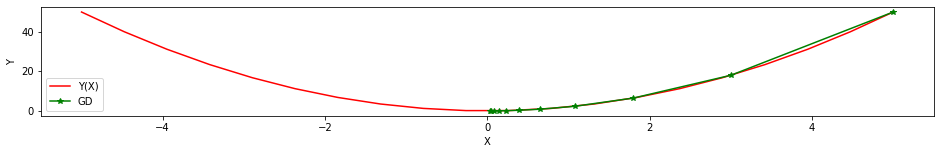

In [9]:
plt.figure(figsize=(16, 2))
plt.plot(X, Y, 'r', label='Y(X)')

# количество итерация 
n = 10
for i in range(n):
    current_point = next_point

    # движение в негативную сторону вычисляемого градиента
    next_point = current_point - learning_rate * gr_func(current_point)
    x.append(next_point)
    # print(next_point)                                     

    n_iter += 1

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {n_iter}")
    print(f"Текущая точка {current_point}| Следующаяя точка {next_point}")
    print("--------------------------------------------------------")
    
    
    if(abs(current_point - next_point) <= eps):
        break

print(f"минимум {next_point}, количество затраченных итераций: {n_iter}") 
X_grad = np.array(x)
plt.plot(X_grad, func(X_grad), '-*g', label = 'GD')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Метод обратного распространения ошибки (backpropagation)

<img src='https://drive.google.com/uc?export=view&id=1HyKXUNjUD80-Wk458JW7ZCqgH0HhX6-m'>

## Небольшой пример по обучению простой нейронной сети <a class='anchor' id='example'>


Рассмотрим создание простой нейронной сети. Данная нейронная сеть будет обучаться предсказывать 3 число на основании первых двух. Для этого мы ей передадим обучающую набор данных из двух последовательностей чисел.

Этот пример позволяет создать и запустить простейшую нейронную сеть, но уже  в этом примере присутсвуют все необходимые атрибуты создания нейронных сетей: 
- подготовка данных для обучения модели
- конфигурация модели
- запуск модели.

Дальше мы разберем, что такое функция активации, обратное распространение, внутренние слои нейронной сети и прочие аспекты создания нейронных сетей.
Обратите внимание, что здесь используется библиотека numpy для получения дополнительных команд при работе с массивами.

### Нейрон для повторения входа <a class='anchor' id='repeat'>

**Производная сигмоиды**

$$\sigma(z) = \frac{1}{1 + exp(-z)}$$

$$\frac{d\sigma(z)}{dz} = -\frac{1}{(1 + exp(-z))^2}(-exp(-z)) = \frac{exp(-z)}{(1 + exp(-z))^2} \text{(*)} = \frac{1}{1 + exp(-z)}(1-\frac{1}{1 + exp(-z)}) = \sigma(1-\sigma)$$

$ (*)\frac{exp(-z) +1-1}{(1 + exp(-z))^2} = \frac{1 + exp(-z) -1}{(1 + exp(-z))^2}= \frac{1 + exp(-z)}{(1 + exp(-z))^2} - \frac{1}{(1 + exp(-z))^2}=$

$ = \frac{1}{(1 + exp(-z))} - \frac{1}{(1 + exp(-z))}\frac{1}{(1 + exp(-z))} = \frac{1}{(1 + exp(-z))}(1- \frac{1}{(1 + exp(-z))}) $

In [10]:
import numpy as np
import matplotlib.pyplot as plt


# вычисление сигмоид функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

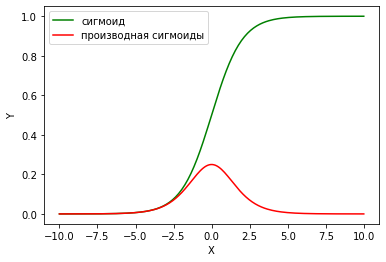

In [11]:
# для картинки
D  = 10

X = np.linspace(0-D, 0+D, 200)
Y = sigmoid(X)
Y_deriv = sigmoid_deriv(X)

plt.plot(X, Y, '-g', label='сигмоид')
plt.plot(X, Y_deriv, '-r', label='производная сигмоиды')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [12]:
# создание данных для обучения
X = np.array([[1]])
y = np.array([[1]]).T

# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))

display(weights, bias)

array([[0.417022]])

array([[0.72032449]])

forward

In [13]:
# сделаем предсказание
output = X * weights + bias
pred = sigmoid(output)
pred

array([[0.75719212]])

In [14]:
# ошибка
(y - pred) ** 2

array([[0.05895567]])

Backward

[Ссылка](https://docs.google.com/presentation/d/1Sfj8l91QFkFA6kMCe4CStCRDH5-pmfnZc8AEe8ujudg/edit?usp=sharing) на презентацию.

**dL/dL**

$\frac{dL}{dL} = 1$

**dL/dsigma**

$Loss = (y - \sigma)^2$

<h3>$\frac{dL}{\sigma} = 2*\frac{dL}{dL}\frac{dL}{d\sigma} = 2 * (\sigma - y) = 2 *(0.757 - 1) = -0.484$</h3>


**dL/db**

$y_{pred} = \sigma(output)$

<h3>$\frac{dL}{db} = \frac{dL}{d\sigma}\frac{d\sigma}{db} = -0.484 * (0.757 * (1-0.757)) = -0.089$</h3>

**dL/da**

$b = w_0 + a$

<h3>$\frac{dL}{da} = \frac{dL}{db}\frac{db}{da} = -0.089 * 1$</h3>

**dL/dw0**

$b = w_0 + a$

<h3>$\frac{dL}{dw_0} = \frac{dL}{db}\frac{db}{dw_0} = -0.089 * 1$</h3>

**dL/dw1**

$a = w_1*x$

<h3>$\frac{dL}{dw_1} = \frac{dL}{da}\frac{da}{dw_1} = -0.089 * x = -0.089 * 1$</h3>



In [15]:
# сделаем backprop
# dloss/dloss = 1
dsigm = 2 * (pred - y)
dsigm
db = dsigm * sigmoid_deriv(output)
db
da = 1 * db
da
dw0 = 1 * db
dw0
dw1 = da * X
dw1

array([[-0.08928153]])

In [16]:
# обновим параметры
bias -= dw0
weights -= dw1

In [17]:
sigmoid(np.dot(X, weights) + bias)

array([[0.78850036]])

#### Обучение на большем количестве объектов

In [18]:
# создание данных для обучения
X = np.array([[0], [1]])
y = np.array([[0, 1]]).T

# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))

display(weights, bias)

array([[0.417022]])

array([[0.72032449]])

Forward

In [19]:
# сделаем предсказание
output = X * weights + bias
pred = sigmoid(output)
pred

array([[0.67267847],
       [0.75719212]])

In [20]:
# ошибка
np.mean((y - pred) ** 2)

0.2557259944893541

Backward

In [21]:
# сделаем backprop
# dloss/dloss = 1
dsigm = (pred - y)
print(dsigm)
db = dsigm * sigmoid_deriv(output)
print(db)
da = 1 * db
print(da)
dw0 = np.ones((X.shape[0])) @ db
print(dw0)
dw1 = np.ones((X.shape[0])) @ (da * X)
# dw1 = da.T @ X
print(dw1)

[[ 0.67267847]
 [-0.24280788]]
[[ 0.14811179]
 [-0.04464077]]
[[ 0.14811179]
 [-0.04464077]]
[0.10347102]
[-0.04464077]


In [22]:
# обновим параметры
bias -= dw0
weights -= dw1

In [23]:
# сделаем предсказания
sigmoid(np.dot(X, weights) + bias)

array([[0.64950258],
       [0.74621309]])

In [24]:
# тренировка нейронной сети
def train_nn(X, y, num_iters):
    global weights, bias
    for n_iter in range(num_iters):
        # проход данных через нейрон
        output = run_nn(X)

        # вычисление ошибки через обратное распространение back-propagation
        error = output - y
            
        # выполнение корректировки весов
        grad = np.dot(X.T, error * sigmoid_deriv(output))
        grad_bias = np.sum(error * sigmoid_deriv(output), keepdims=1)
        weights -= grad
        bias -= grad_bias


# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global weights, bias
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, weights) + bias)
    return output

In [25]:
# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))
print("веса до обучения: ")
print(weights, bias)

# запуск тренировки нейронной сети 
train_nn(X, y, 100000)
print("веса после завершения обучения: ")
print(weights, bias)

веса до обучения: 
[[0.417022]] [[0.72032449]]
веса после завершения обучения: 
[[18.21983522]] [[-9.02726036]]


In [26]:
user_inp1, user_inp2 = 0, 1
print(f"Проверка на новых данных: {user_inp1} {user_inp2}")
print("Предсказание нейронной сети: ")
print(run_nn(np.array([[user_inp1], [user_inp2]])))

Проверка на новых данных: 0 1
Предсказание нейронной сети: 
[[1.20076629e-04]
 [9.99898218e-01]]


### Нейрон для регрессии <a class='anchor' id='reg'>

In [27]:
# вычисление ReLU функции

def ReLU(x):
    return x * (x > 0)

In [28]:
def ReLU_deriv(x):
    return np.where(x >= 0, 1, 0)

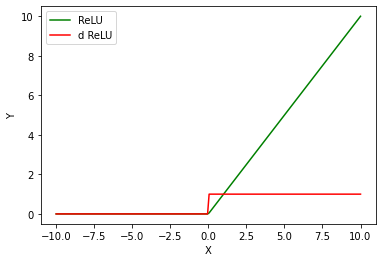

In [29]:
# для картинки
D = 10

X = np.linspace(0-D, 0+D, 200)
Y = ReLU(X)
dY = ReLU_deriv(X)

plt.plot(X, Y, '-g', label='ReLU')
plt.plot(X, dY, '-r', label='d ReLU')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [30]:
# тренировка нейронной сети
def train_nn(X, y, num_iters):
    global weights, bias
    for n_iter in range(num_iters):
        # проход данных через нейрон
        output = run_nn(X)

        # вычисление ошибки через обратное распространение back-propagation
        error = output - y
            
        # выполнение корректировки весов
        grad = np.dot(X.T, error * ReLU_deriv(output))
        grad_bias = np.sum(error * ReLU_deriv(output), keepdims=1)
        weights -= 0.01 * grad
        bias -= 0.01 * grad_bias


# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global weights, bias
    inputs = inputs.astype(float)
    output = ReLU(np.dot(inputs, weights) + bias)
    return output

In [31]:
# создание данных для обучения
X = np.array([[1], [3], [2], [4], [7]])
y = np.array([[3, 9, 6, 12, 21]]).T

# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))
print("веса до обучения: ")
print(weights, bias)

# запуск тренировки нейронной сети 
train_nn(X, y, 10000)
print("веса после завершения обучения: ")
print(weights, bias)

веса до обучения: 
[[0.417022]] [[0.72032449]]
веса после завершения обучения: 
[[3.]] [[3.10711067e-15]]


In [32]:
user_inp1, user_inp2 = 5, 9
print(f"Проверка на новых данных: {user_inp1} {user_inp2}")
print("Предсказание нейронной сети: ")
print(run_nn(np.array([[user_inp1], [user_inp2]])))

Проверка на новых данных: 5 9
Предсказание нейронной сети: 
[[15.]
 [27.]]


### Нейрон для многоклассовой классификации <a class='acnhor' id='multiclass'>

In [33]:
import numpy as np
import matplotlib.pyplot as plt


# вычисление сигмоид функции
def sigmoid(x):
    x = np.clip(x, a_min=-500, a_max=500)
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

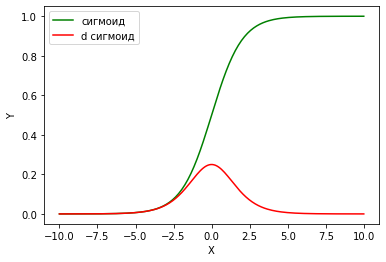

In [34]:
# для картинки
D = 10

X = np.linspace(0-D, 0+D, 200)
Y = sigmoid(X)
dY = sigmoid_deriv(X)

plt.plot(X, Y, '-g', label='сигмоид')
plt.plot(X, dY, '-r', label='d сигмоид')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

(1797, 64)


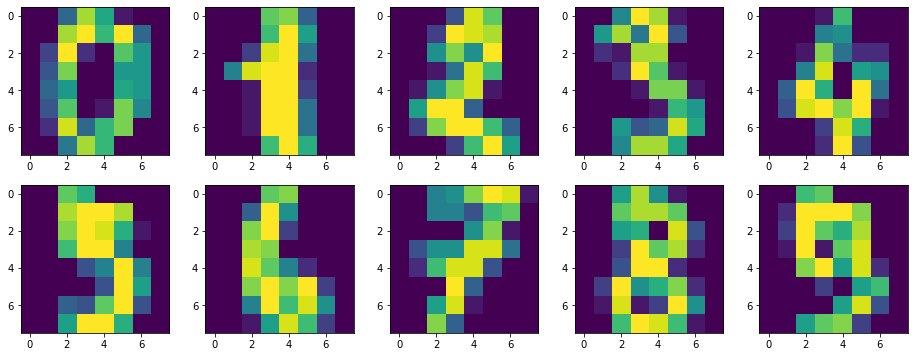

In [35]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape) # расскоментируйте, чтобы размер данных

# репрезентация данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]))

In [36]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [37]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [38]:
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [39]:
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [40]:
# тренировка нейронной сети
def train_nn(X, y, num_iters):
    global weights
    for n_iter in range(num_iters):
        # проход данных через нейрон
        output = run_nn(X)

        # вычисление ошибки через обратное распространение back-propagation
        error = output - y
        
        # выполнение корректировки весов
        grad = np.dot(X.T, error * sigmoid_deriv(output))

        weights -= 0.01 * grad
        
        
        error = np.mean(np.abs(error))
        errors.append(error)
        
        # получение метрики качества
        preds = np.argmax(output, axis=1)
        labels = np.argmax(y, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
        metrics.append(accuracy)

# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global weights
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, weights))
    return output

In [41]:
# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X_train.shape[1], 10))
errors = []
metrics = []

In [42]:
weights.size

640

Пример нашей нейронной сети


<img src="https://drive.google.com/uc?export=view&id=1WVFYOM5vIl8ooYzyB5kFhBrRLc4su7_K" width=200px />

In [43]:
# запуск тренировки нейронной сети 
epochs = 20
train_nn(X_train, y_train, epochs)

Предсказание нейронной сети: 
2


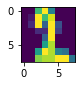

In [44]:
ind = np.random.randint(0, X_test.shape[0])
test_img = X_test[ind]
plt.figure(figsize=(1, 1))
plt.imshow(test_img.reshape([8,8]))

print("Предсказание нейронной сети: ")
print(np.argmax(run_nn(X_test[ind])))

In [45]:
run_nn(X_test[ind])

array([0.00141616, 0.13769793, 0.93216512, 0.02312001, 0.00229921,
       0.02337297, 0.00431845, 0.00625284, 0.06007353, 0.01673659])

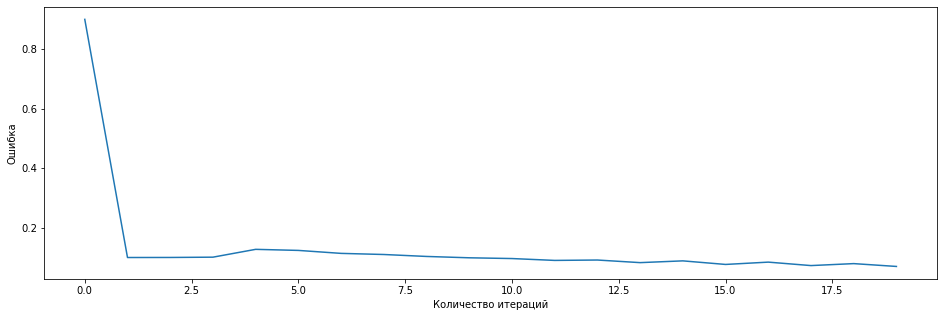

In [46]:
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка')
plt.show()

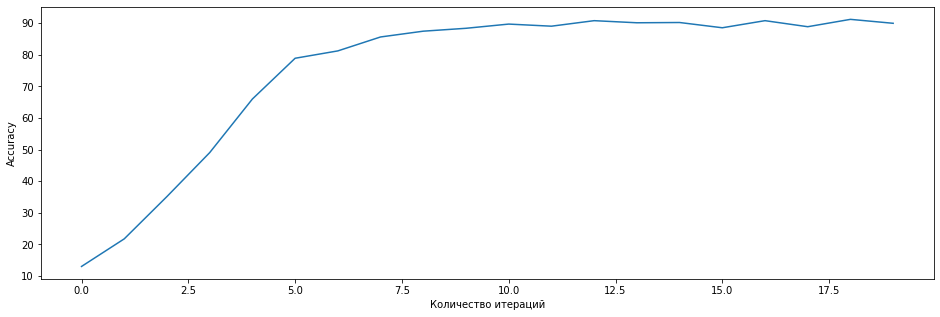

In [47]:
plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [48]:
test_preds = np.argmax(run_nn(X_test), axis=1)
test_labels = np.argmax(y_test, axis=1)

test_accuracy = (test_preds == test_labels).sum() * 100 / len(test_labels)
print(f'Accuracy на тесте {test_accuracy:.2f}%')

Accuracy на тесте 88.05%


## Пример построения  двухслойной нейронной сети на numpy <a class='anchor' id='example2'>

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# ДЗ
## КАКИЕ ПАРАМЕТРЫ ИЗМЕНИЛ В ДЗ
Увеличил кол-во нейронов: neuron_numb = 5 -> 11  
Увеличил кол-во итераций: num_epochs = 100 -> 10000

ps. Я попытался добавить 3тий слой но метрики были не лучшими, а здесь я сделал выжимку из всех экспериментов

In [199]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 11

# присваивание случайных весов
np.random.seed(1)
w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

#w2 = np.random.random((15, 10)) # 3тий слой 

# скорость обучения (learning rate)
learning_rate = 0.1

# количество итераций
num_epochs = 10000

# массив для ошибок, чтобы потом построить график
errors = []
metrics = []

# процесс обучения
for i in range(num_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    #layer3 = sigmoid(np.dot(layer2, w2)) #3ТИЙ СЛОЙ 

    # обратное распространение (back propagation)
    # с использованием градиентного спуска
    
    #ПОПЫТКА ДОБАВИТЬ ТРЕТИЙ СЛОЙ
    #layer3_error = layer3 - y_train  
    #layer3_grad = layer3_error * sigmoid_deriv(layer3)
    
    layer2_error = layer2 - y_train  # производная функции потерь
    layer2_grad = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_grad.dot(w1.T)
    layer1_grad = layer1_error * sigmoid_deriv(layer1)
    
    #w2 -= layer3.T.dot(layer3_grad) * learning_rate # 3ТИЙ СЛОЙ 
    
    w1 -= layer1.T.dot(layer2_grad) * learning_rate
    w0 -= layer0.T.dot(layer1_grad) * learning_rate
    
    # ошибка модели
    #error = np.mean(np.abs(layer3_error)) 3ТИЙ СЛОЙ 
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    
    # метрики качества
    preds = np.argmax(layer2, axis=1)
    
   # preds = np.argmax(layer3, axis=1) # 3ТИЙ СЛОЙ 
    
    labels = np.argmax(y_train, axis=1)
    accuracy = (preds == labels).sum() * 100 / len(labels)
    metrics.append(accuracy)

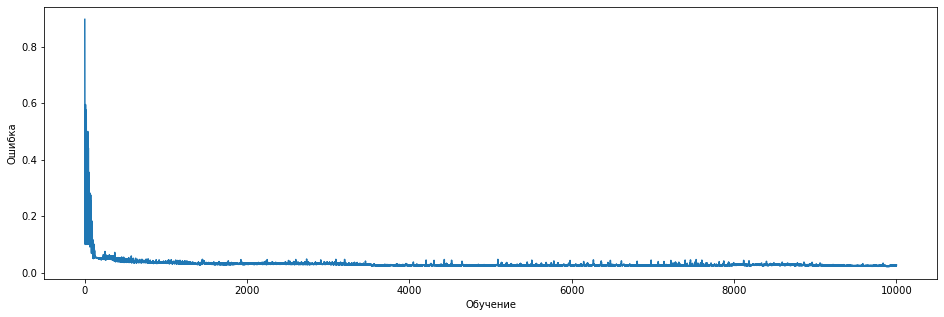

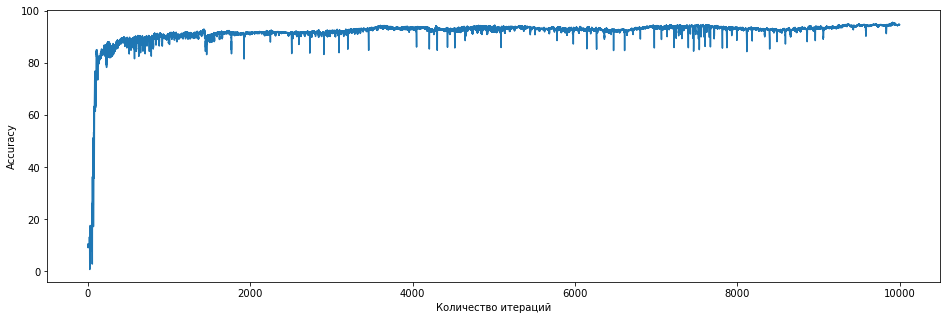

In [200]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [201]:
y_train[:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

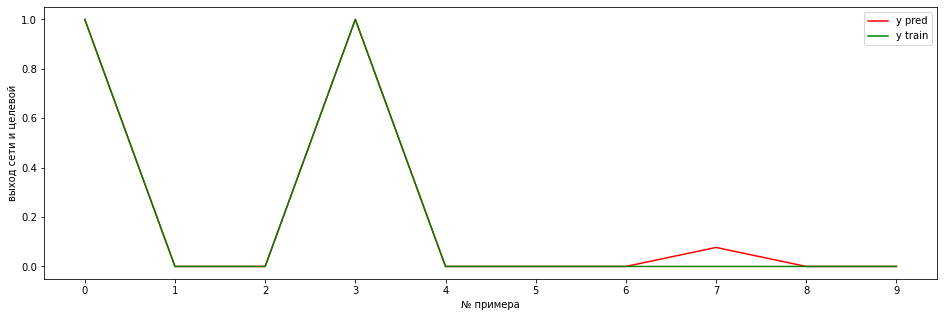

accuracy на обучении 94.68%


In [202]:
N = 10
label = 2
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()
        
print(f"accuracy на обучении {accuracy:.2f}%")

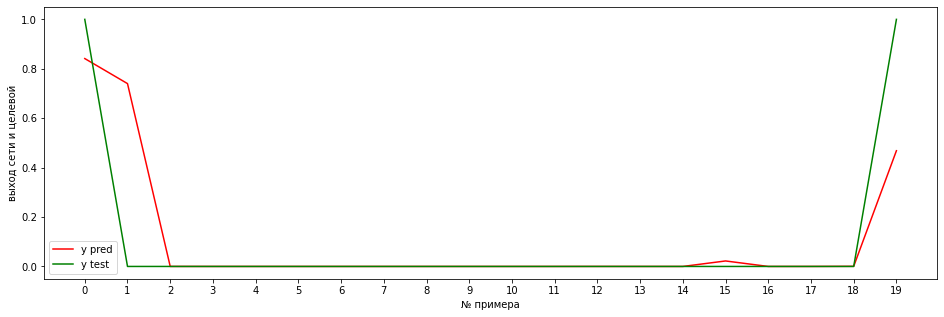

accuracy на тесте 91.08%


In [203]:
# прямое распространение(feed forward)
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
    
    
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")